In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
scm = pd.read_excel('/content/SCM Dataset_Updated.xlsx')

In [33]:
# Checking tthe column names and variables
scm.head()

,Company Name,SCM Practices,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Technology Utilized,Environmental Impact Score,Supply Chain Agility,...,z_score_customer_sts,z_score_supplier_lead,z_score_inv_acc,z_score_trns_eff,z_score_cogs,z_score_oes,z_score_revenue_grth,z_score_sc_risk,z_score_sc_res,z_score_rel_score
0,Apple,Agile SCM,300.0,7.0,8.0,94.0,91.0,<built-in method ravel of numpy.ndarray object...,70.0,High,...,0.777590,-0.804765,0.499815,1.204407,0.012154,0.493138,0.590551,-0.684604,0.670040,0.390309
1,Microsoft,Lean Manufacturing,200.0,5.2,15.0,91.0,89.0,<built-in method ravel of numpy.ndarray object...,75.0,High,...,-0.104009,1.096759,-0.355638,-0.914016,0.430235,-1.290978,-0.430013,1.066252,-1.083887,0.390309
2,Google,Cross-Docking,20000.0,7.5,4.0,95.0,90.0,<built-in method ravel of numpy.ndarray object...,70.0,High,...,0.336791,-1.438606,0.499815,0.357038,-1.660171,-1.290978,0.590551,-1.384947,0.670040,0.390309
3,Amazon,Agile SCM,500.0,10.5,15.0,95.0,90.0,<built-in method ravel of numpy.ndarray object...,70.0,High,...,0.336791,4.265966,-2.066544,-3.032440,1.266397,-2.004624,-1.450577,1.066252,-0.031531,0.390309
4,Facebook,Lean Manufacturing,100.0,5.8,12.0,89.0,88.0,<built-in method ravel of numpy.ndarray object...,75.0,High,...,-0.544808,0.462918,-0.355638,-0.914016,-1.242090,-1.290978,-0.430013,0.365909,-1.083887,-1.364109


In [4]:
# Checking the datatypes
scm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company Name                           999 non-null    object 
 1   SCM Practices                          999 non-null    object 
 2   Supplier Count                         999 non-null    float64
 3   Inventory Turnover Ratio               999 non-null    float64
 4   Lead Time (days)                       999 non-null    float64
 5   Order Fulfillment Rate (%)             999 non-null    float64
 6   Customer Satisfaction (%)              999 non-null    float64
 7   Technology Utilized                    999 non-null    object 
 8   Environmental Impact Score             89 non-null     float64
 9   Supply Chain Agility                   999 non-null    object 
 10  Supplier Lead Time Variability (days)  999 non-null    float64
 11  Inven

In [5]:
scm.describe()

,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Environmental Impact Score,Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supply Chain Resilience Score,Supplier Relationship Score,Total Implementation Cost
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,89.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,1.000000e+03
mean,4.320298e+04,6.332933,11.449449,91.734735,89.214214,75.449438,3.275275,97.410410,87.151151,83.450450,10.834835,8.954955,88.088088,83.882883,1.100000e+05
std,2.136656e+05,5.477182,4.204349,2.890920,2.265927,5.092354,1.590711,1.169816,2.378969,2.311706,1.950733,2.862054,2.858424,2.851589,1.762345e+09
min,1.000000e+02,1.000000,2.000000,87.000000,85.000000,65.000000,1.000000,95.000000,80.000000,75.000000,8.000000,3.000000,80.000000,78.000000,-5.566534e+10
25%,2.000000e+02,4.500000,10.000000,90.000000,88.000000,70.000000,2.000000,97.000000,85.000000,81.000000,10.000000,8.000000,85.000000,80.000000,2.944357e+07
50%,3.000000e+02,5.500000,11.000000,91.000000,89.000000,75.000000,3.000000,98.000000,88.000000,85.000000,11.000000,10.000000,88.000000,85.000000,5.549858e+07
75%,5.000000e+02,6.200000,14.000000,93.000000,91.000000,80.000000,4.000000,98.000000,88.000000,85.000000,11.000000,10.000000,90.000000,85.000000,8.395985e+07
max,1.300000e+06,50.000000,22.000000,99.000000,94.000000,90.000000,10.000000,99.000000,92.000000,90.000000,20.000000,15.000000,95.000000,90.000000,1.098856e+08


In [6]:
# Checking for the null values
print(scm.isnull().sum())

Company Name                               1
SCM Practices                              1
Supplier Count                             1
Inventory Turnover Ratio                   1
Lead Time (days)                           1
Order Fulfillment Rate (%)                 1
Customer Satisfaction (%)                  1
Technology Utilized                        1
Environmental Impact Score               911
Supply Chain Agility                       1
Supplier Lead Time Variability (days)      1
Inventory Accuracy (%)                     1
Transportation Cost Efficiency (%)         1
Supply Chain Integration Level             1
Sustainability Practices                   1
Supply Chain Complexity Index              1
Cost of Goods Sold (COGS)                  1
Operational Efficiency Score               1
Revenue Growth Rate out of (15)            1
Supply Chain Risk (%)                      1
Supplier Collaboration Level               1
Supply Chain Resilience Score              1
Supplier R

In [7]:
scm = scm.dropna()

In [8]:
# Changing datatype to category
categorical_columns = [
    'Company Name',
    'SCM Practices',
    'Technology Utilized',
    'Supply Chain Agility',
    'Supply Chain Integration Level',
    'Sustainability Practices',
    'Supply Chain Complexity Index',
    'Supplier Collaboration Level'
]

In [9]:
for col in categorical_columns:
    scm[col] = scm[col].astype('category')

<ipython-input-9-57a37dd6884e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scm[col] = scm[col].astype('category')
<ipython-input-9-57a37dd6884e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scm[col] = scm[col].astype('category')
<ipython-input-9-57a37dd6884e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [10]:
scm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 88
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Company Name                           89 non-null     category
 1   SCM Practices                          89 non-null     category
 2   Supplier Count                         89 non-null     float64 
 3   Inventory Turnover Ratio               89 non-null     float64 
 4   Lead Time (days)                       89 non-null     float64 
 5   Order Fulfillment Rate (%)             89 non-null     float64 
 6   Customer Satisfaction (%)              89 non-null     float64 
 7   Technology Utilized                    89 non-null     category
 8   Environmental Impact Score             89 non-null     float64 
 9   Supply Chain Agility                   89 non-null     category
 10  Supplier Lead Time Variability (days)  89 non-null     float64 
 11  

In [11]:
scm["Cost of Goods Sold (COGS)"] = pd.to_numeric(scm["Cost of Goods Sold (COGS)"].str.replace('$', '').str.replace('B', ''), errors='coerce')

In [12]:
# Imputing the variables
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scm["Supplier Count"] = imputer.fit_transform(scm[["Supplier Count"]])
scm["Inventory Turnover Ratio"] = imputer.fit_transform(scm[["Inventory Turnover Ratio"]])
scm["Lead Time (days)"] = imputer.fit_transform(scm[["Lead Time (days)"]])
scm["Order Fulfillment Rate (%)"] = imputer.fit_transform(scm[["Order Fulfillment Rate (%)"]])
scm["Customer Satisfaction (%)"] = imputer.fit_transform(scm[["Customer Satisfaction (%)"]])
scm["Supplier Lead Time Variability (days)"] = imputer.fit_transform(scm[["Supplier Lead Time Variability (days)"]])
scm["Inventory Accuracy (%)"] = imputer.fit_transform(scm[["Inventory Accuracy (%)"]])
scm["Transportation Cost Efficiency (%)"] = imputer.fit_transform(scm[["Transportation Cost Efficiency (%)"]])
scm["Cost of Goods Sold (COGS)"] = imputer.fit_transform(scm[["Cost of Goods Sold (COGS)"]])
scm["Operational Efficiency Score"] = imputer.fit_transform(scm[["Operational Efficiency Score"]])
scm["Revenue Growth Rate out of (15)"] = imputer.fit_transform(scm[["Revenue Growth Rate out of (15)"]])
scm["Supply Chain Risk (%)"] = imputer.fit_transform(scm[["Supply Chain Risk (%)"]])
scm["Supply Chain Resilience Score"] = imputer.fit_transform(scm[["Supply Chain Resilience Score"]])
scm["Supplier Relationship Score"] = imputer.fit_transform(scm[["Supplier Relationship Score"]])


In [13]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scm["Company Name "] = imputer1.fit_transform(scm[["Company Name"]]).ravel()
scm["SCM Practicest"] = imputer1.fit_transform(scm[["SCM Practices"]]).ravel()
scm["Technology Utilized"] = imputer1.fit_transform(scm[["Technology Utilized"]]).ravel
scm["Supply Chain Agility"] = imputer1.fit_transform(scm[["Supply Chain Agility"]]).ravel()
scm["Supply Chain Integration Level"] = imputer1.fit_transform(scm[["Supply Chain Integration Level"]]).ravel()
scm["Sustainability Practices"] = imputer1.fit_transform(scm[["Sustainability Practices"]]).ravel()
scm["Supply Chain Complexity Index"] = imputer1.fit_transform(scm[["Supply Chain Complexity Index"]]).ravel()
scm["Supplier Collaboration Level"] = imputer1.fit_transform(scm[["Supplier Collaboration Level"]]).ravel()

In [34]:
# Checking for the outliers using z-score
scm['z_score supplier_cnt'] = zscore(scm['Supplier Count'])
outliers = scm[scm['z_score supplier_cnt'].abs() < 3]
scm['z_score_inventory'] = zscore(scm['Inventory Turnover Ratio'])
outliers = scm[scm['z_score_inventory'].abs() < 3]
scm['z_score_lead_time'] = zscore(scm['Lead Time (days)'])
outliers = scm[scm['z_score_lead_time'].abs() < 3]
scm['z_score_lead_time_order_fulfillment'] = zscore(scm['Order Fulfillment Rate (%)'])
outliers = scm[scm['z_score_lead_time_order_fulfillment'].abs() < 3]
scm['z_score_customer_sts'] = zscore(scm['Customer Satisfaction (%)'])
outliers = scm[scm['z_score_customer_sts'].abs() < 3]
scm['z_score_supplier_lead'] = zscore(scm['Supplier Lead Time Variability (days)'])
outliers = scm[scm['z_score_supplier_lead'].abs() < 3]
scm['z_score_inv_acc'] = zscore(scm['Inventory Accuracy (%)'])
outliers = scm[scm['z_score_inv_acc'].abs() < 3]
scm['z_score_trns_eff'] = zscore(scm['Transportation Cost Efficiency (%)'])
outliers = scm[scm['z_score_trns_eff'].abs() < 3]
scm['z_score_cogs'] = zscore(scm['Cost of Goods Sold (COGS)'])
outliers = scm[scm['z_score_cogs'].abs() < 3]
scm['z_score_oes'] = zscore(scm['Operational Efficiency Score'])
outliers = scm[scm['z_score_oes'].abs() < 3]
scm['z_score_revenue_grth'] = zscore(scm['Revenue Growth Rate out of (15)'])
outliers = scm[scm['z_score_revenue_grth'].abs() < 3]
scm['z_score_sc_risk'] = zscore(scm['Supply Chain Risk (%)'])
outliers = scm[scm['z_score_sc_risk'].abs() < 3]
scm['z_score_sc_res'] = zscore(scm['Supply Chain Resilience Score'])
outliers = scm[scm['z_score_sc_res'].abs() < 3]
scm['z_score_rel_score'] = zscore(scm['Supplier Relationship Score'])
outliers = scm[scm['z_score_rel_score'].abs() < 3]

In [15]:
print(scm[['Revenue Growth Rate out of (15)', 'z_score_revenue_grth']].head())

   Revenue Growth Rate out of (15)  z_score_revenue_grth
0                             12.0              0.590551
1                             10.0             -0.430013
2                             12.0              0.590551
3                              8.0             -1.450577
4                             10.0             -0.430013


In [16]:
print(outliers[['Revenue Growth Rate out of (15)', 'z_score_revenue_grth']])

    Revenue Growth Rate out of (15)  z_score_revenue_grth
0                              12.0              0.590551
1                              10.0             -0.430013
2                              12.0              0.590551
3                               8.0             -1.450577
4                              10.0             -0.430013
..                              ...                   ...
84                             11.0              0.080269
85                             10.0             -0.430013
86                              9.0             -0.940295
87                             10.0             -0.430013
88                              9.0             -0.940295

[89 rows x 2 columns]


create boxplot for outliers

In [17]:
numerical_cols = scm.select_dtypes(include=['float64', 'int64']).columns

In [18]:
plt.figure(figsize=(25, 30))

<Figure size 2500x3000 with 0 Axes>

<Figure size 2500x3000 with 0 Axes>

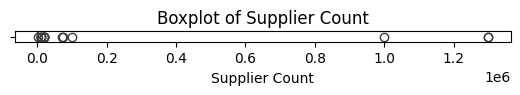

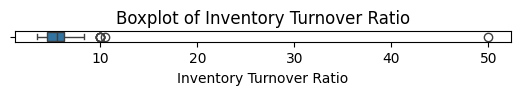

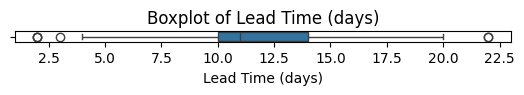

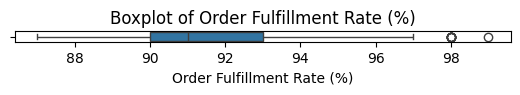

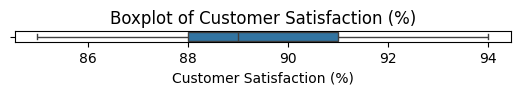

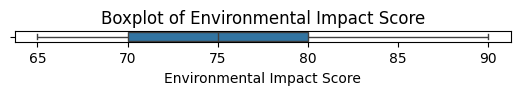

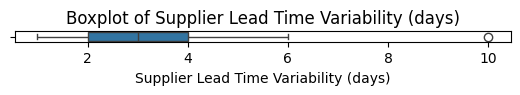

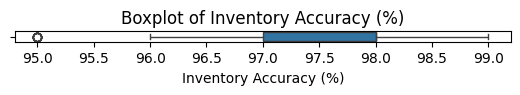

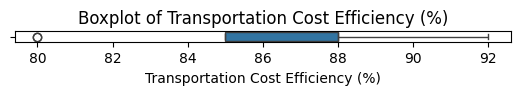

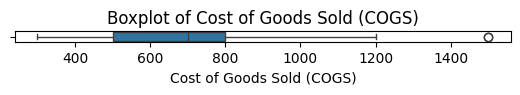

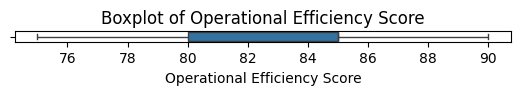

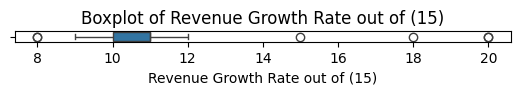

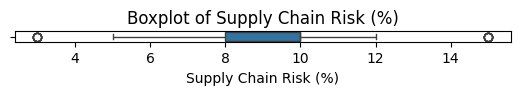

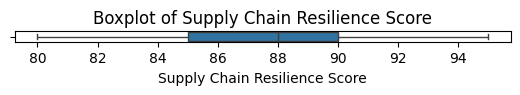

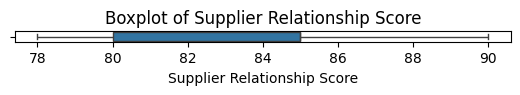

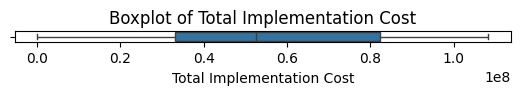

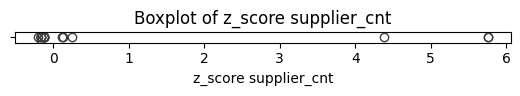

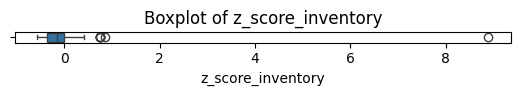

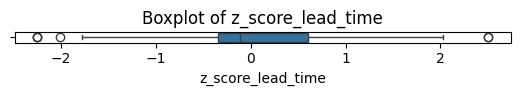

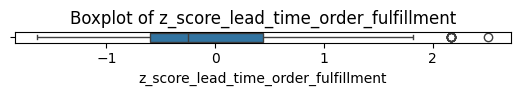

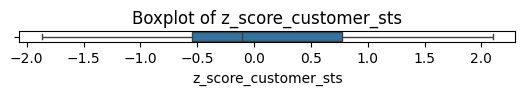

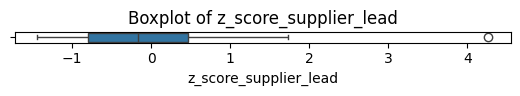

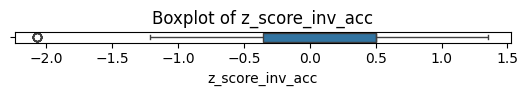

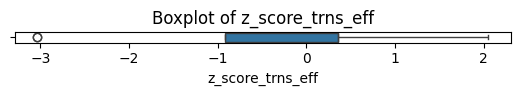

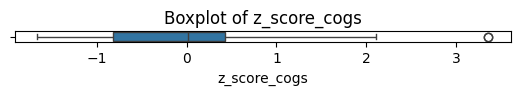

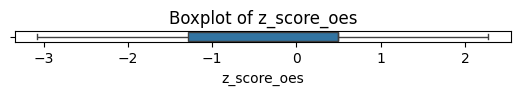

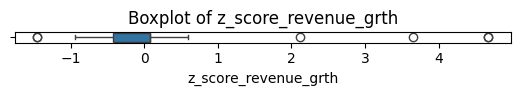

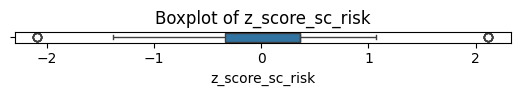

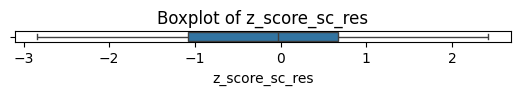

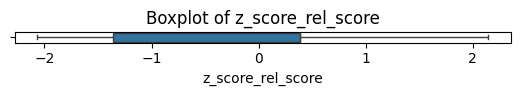

In [19]:

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=scm[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Key Insights:

Supplier count (z_score_supplier_cnt): Several high outliers, with z-scores above 4, indicating some suppliers with extremely high counts.
Inventory (z_score_inventory): A notable high outlier with a z-score around 8, suggesting an extremely high inventory level for at least one case.
Lead time order fulfillment (z_score_lead_time_order_fulfillment): A few high outliers with z-scores above 2, indicating some instances of significantly longer lead times for order fulfillment.
Supplier lead (z_score_supplier_lead): A high outlier with a z-score around 4, suggesting at least one case of extremely long supplier lead time.
COGS (z_score_cogs): A high outlier with a z-score above 3, indicating at least one instance of extremely high cost of goods sold.
Revenue growth (z_score_revenue_grth): Multiple high outliers, with z-scores ranging from about 2 to 4, suggesting several cases of exceptionally high revenue growth.

# Scatter Plot Revenue Growth Rate out of(15)(Target) vs all other variables

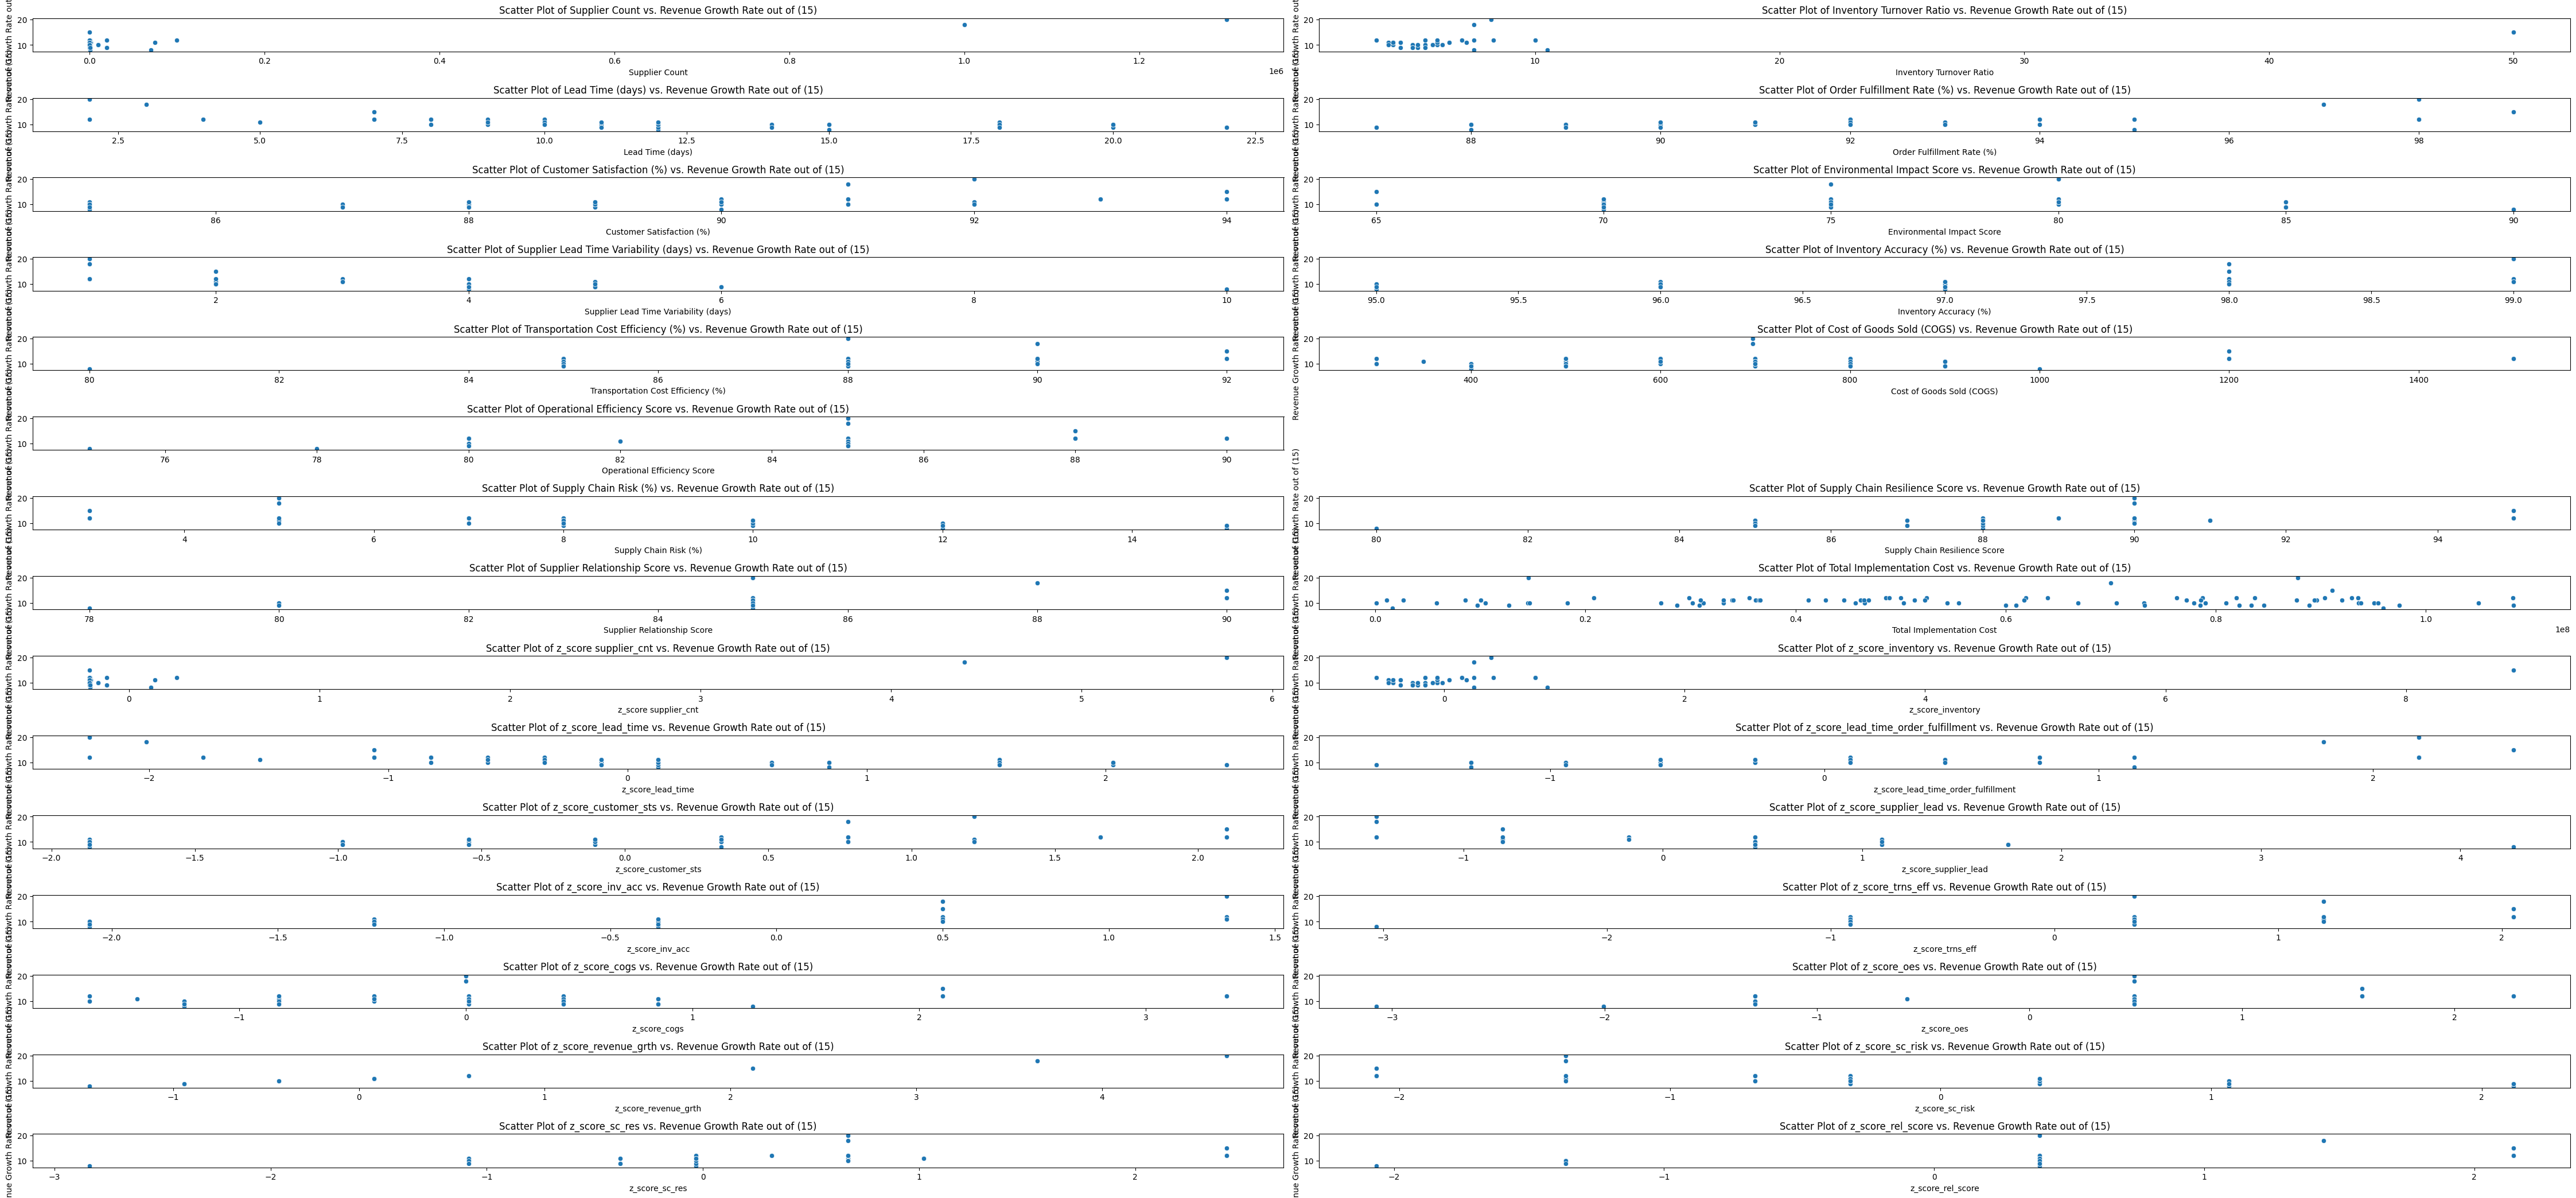

In [20]:
numerical_cols = scm.select_dtypes(include=['float64', 'int64']).columns

target_var = 'Revenue Growth Rate out of (15)'

plt.figure(figsize=(45, 40))

for i, col in enumerate(numerical_cols, 1):
    if col != target_var:
        plt.subplot(len(numerical_cols) - 1, 2, i)
        sns.scatterplot(x=scm[col], y=scm[target_var])
        plt.title(f'Scatter Plot of {col} vs. {target_var}')
        plt.xlabel(col)
        plt.ylabel(target_var)
plt.tight_layout()
plt.show()

1. Supplier Count vs. Revenue Growth Rate
The data points are widely scattered with no clear trend, indicating a weak or no correlation between the number of suppliers and revenue growth rate.
The spread shows that revenue growth can be high or low regardless of the supplier count.
2. Lead Time (days) vs. Revenue Growth Rate
Similar to the previous plot, there's no evident linear trend.
The data points are dispersed, suggesting that lead time does not directly impact the revenue growth rate.
3. Customer Satisfaction (%) vs. Revenue Growth Rate
There appears to be a slight positive trend where higher customer satisfaction might lead to higher revenue growth rates, but the correlation is not strong.
Data points are more clustered around higher satisfaction percentages.
4. Supplier Lead Time Variability (days) vs. Revenue Growth Rate
This plot shows scattered points without any clear pattern, indicating no strong relationship between lead time variability and revenue growth.
5. Transportation Cost Efficiency (%) vs. Revenue Growth Rate
There is no distinct trend or pattern observed.
Revenue growth rates are spread across different transportation cost efficiencies.
6. Operational Efficiency Score vs. Revenue Growth Rate
The points are more clustered at higher operational efficiency scores but still show no clear linear relationship.
Revenue growth rates are spread across different operational efficiency scores.
7. Supply Chain Risk (%) vs. Revenue Growth Rate
Data points are scattered widely, suggesting no clear relationship between supply chain risk and revenue growth rate.
High revenue growth can occur even with higher supply chain risks and vice versa.
8. Supplier Relationship Score vs. Revenue Growth Rate
No clear trend is visible; the relationship score does not appear to significantly impact revenue growth rate.
9. Inventory Turnover Ratio vs. Revenue Growth Rate
There is a wide scatter with no clear pattern, indicating a weak or no correlation between inventory turnover and revenue growth rate.
10. Order Fulfillment Rate (%) vs. Revenue Growth Rate
Points are clustered around higher fulfillment rates but with no evident trend indicating that higher fulfillment rates lead to higher revenue growth.
11. Environmental Impact Score vs. Revenue Growth Rate
The scatter plot shows no clear pattern or correlation.
Revenue growth does not seem to be significantly impacted by the environmental impact score.
12. Inventory Accuracy (%) vs. Revenue Growth Rate
Data points are more clustered at higher inventory accuracy percentages but still show no clear linear relationship.
13. Cost of Goods Sold (COGS) vs. Revenue Growth Rate
The scatter plot shows no clear trend, indicating that COGS does not directly correlate with revenue growth rate.
14. Supply Chain Resilience Score vs. Revenue Growth Rate
Points are more clustered at higher resilience scores but do not show a strong linear relationship with revenue growth.
15. Total Implementation Cost vs. Revenue Growth Rate
The data points are widely scattered, indicating a weak or no correlation between implementation cost and revenue growth rate.
16. Z-Score of Various Metrics vs. Revenue Growth Rate
These plots standardize the metrics to see if extreme values correlate with revenue growth.
Z-scores for supplier count, lead time, customer satisfaction, and other metrics do not show strong linear relationships with revenue growth.
Most z-score plots also show widely scattered data points with no clear trend.

# Correlation of all the variables using heatmap

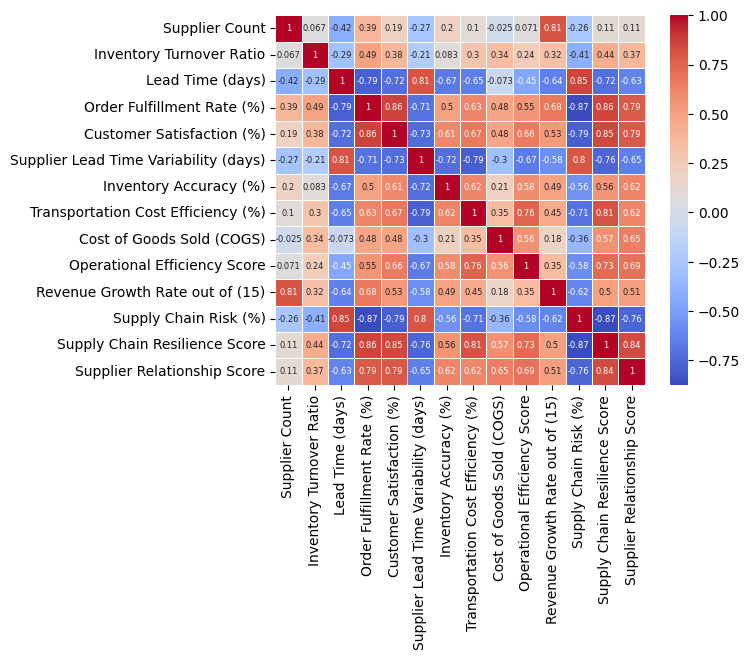

<Figure size 15000x12000 with 0 Axes>

In [21]:
correlation_matrix = scm[['Supplier Count',"Inventory Turnover Ratio","Lead Time (days)","Order Fulfillment Rate (%)","Customer Satisfaction (%)","Supplier Lead Time Variability (days)","Inventory Accuracy (%)","Transportation Cost Efficiency (%)","Cost of Goods Sold (COGS)","Operational Efficiency Score","Revenue Growth Rate out of (15)","Supply Chain Risk (%)","Supply Chain Resilience Score","Supplier Relationship Score"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',square=True, linewidths=0.70,annot_kws={"size": 6})
plt.figure(figsize=(150, 120))
plt.show()

Strong positive correlations:

Order Fulfillment Rate and Customer Satisfaction (0.86)
Supply Chain Resilience Score and Order Fulfillment Rate (0.86)
Supply Chain Resilience Score and Customer Satisfaction (0.85)
Lead Time and Supply Chain Risk (0.85)


Strong negative correlations:

Lead Time and Order Fulfillment Rate (-0.79)
Lead Time and Customer Satisfaction (-0.72)
Supply Chain Risk and Order Fulfillment Rate (-0.87)
Supply Chain Risk and Customer Satisfaction (-0.79)


Supplier Count has a strong positive correlation with Revenue Growth Rate (0.81), suggesting that having more suppliers may be associated with higher revenue growth.
Inventory Turnover Ratio shows moderate positive correlations with Order Fulfillment Rate (0.49) and Supply Chain Resilience Score (0.44), indicating that higher inventory turnover may be linked to better fulfillment and resilience.
Transportation Cost Efficiency is strongly correlated with Operational Efficiency Score (0.76), implying that efficient transportation contributes significantly to overall operational efficiency.
Supply Chain Resilience Score and Supplier Relationship Score show strong positive correlations with many other metrics, suggesting their importance in overall supply chain performance.

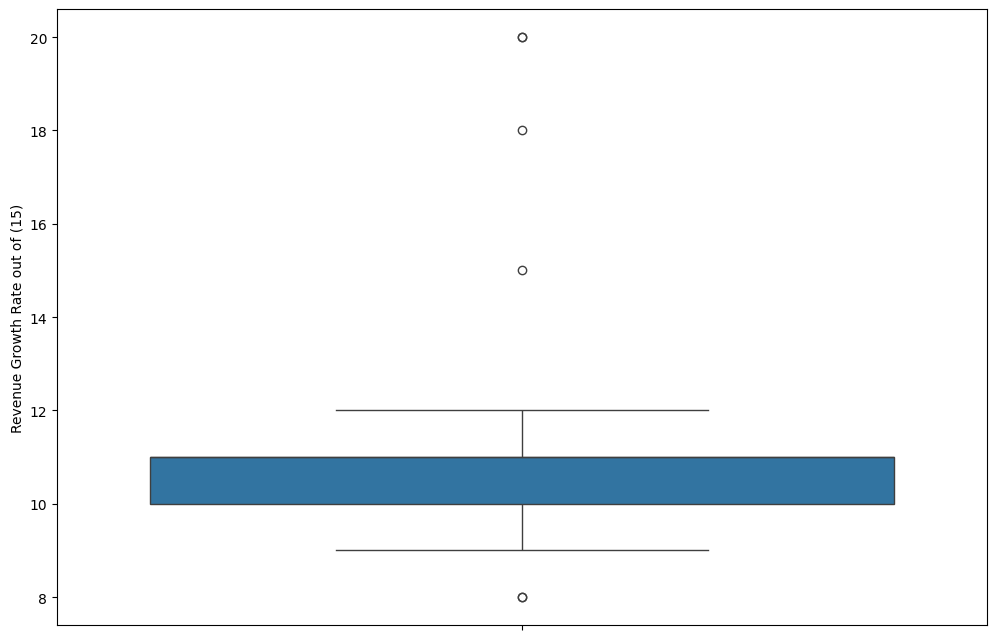

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=scm['Revenue Growth Rate out of (15)'])
plt.show()

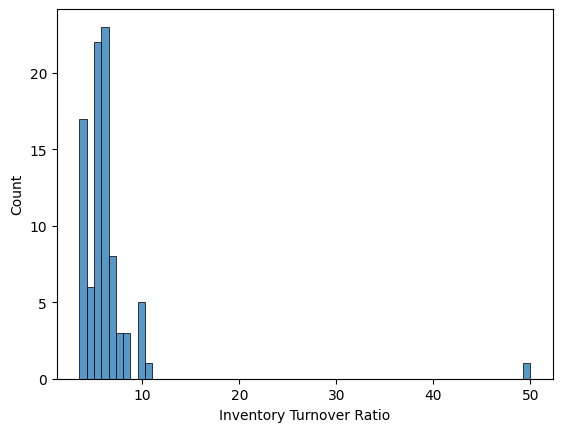

In [23]:
sns.histplot(scm['Inventory Turnover Ratio'])
plt.show()

# Creating bi-variate for relationship between 2 variables

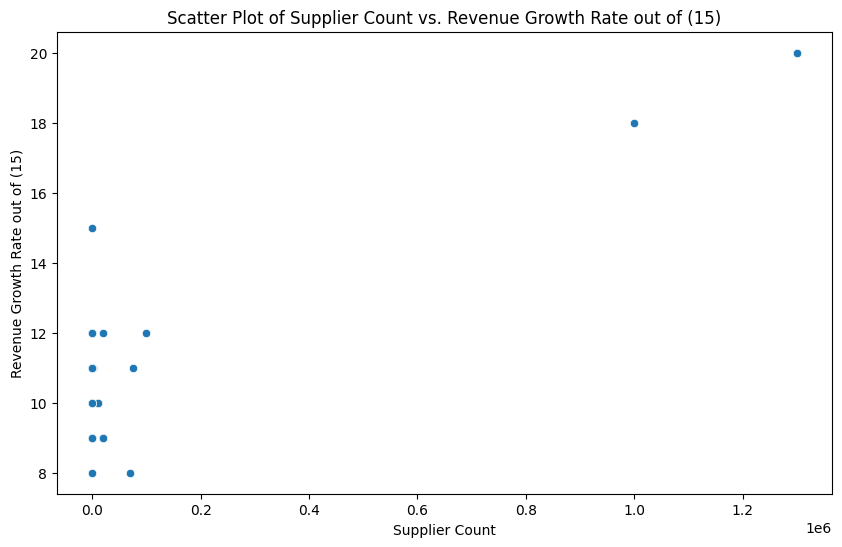

In [24]:
x_var = 'Supplier Count'
y_var = 'Revenue Growth Rate out of (15)'

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scm[x_var], y=scm[y_var])
plt.title(f'Scatter Plot of {x_var} vs. {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

Here are the key observations:

Positive correlation: There appears to be a positive correlation between the number of suppliers and revenue growth rate. As the supplier count increases, the revenue growth rate tends to increase as well.
Data distribution: Most data points are clustered on the left side of the plot, indicating that many companies have a relatively low number of suppliers (less than 200,000).
Outliers: There are two notable outliers on the far right of the plot, with supplier counts above 1 million. These outliers show the highest revenue growth rates (around 18 and 20 out of 15).
Range of revenue growth: The revenue growth rates range from about 8 to 20 out of 15, with most falling between 9 and 12.
Non-linear relationship: The relationship doesn't appear to be strictly linear. There's a general upward trend, but it's not consistent across all supplier counts.
Potential threshold effect: There might be a threshold effect where having a very large number of suppliers (over 1 million) is associated with significantly higher revenue growth rates.
Variability: For companies with lower supplier counts, there's more variability in revenue growth rates, ranging from about 8 to 15.

This plot suggests that having more suppliers is generally associated with higher revenue growth rates, with a particularly strong effect for companies with an extremely large supplier base. However, it's important to note that correlation does not imply causation, and other factors may be influencing this relationship.

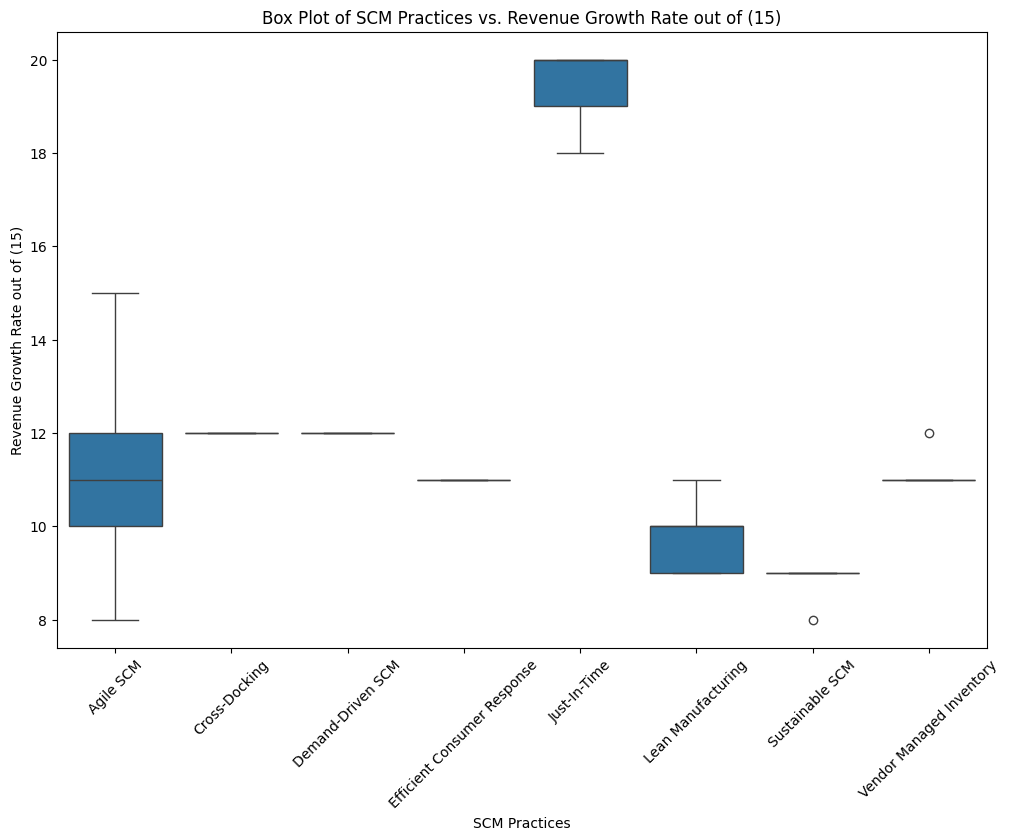

In [25]:
cat_var = 'SCM Practices'
num_var = 'Revenue Growth Rate out of (15)'

plt.figure(figsize=(12, 8))
sns.boxplot(x=scm[cat_var], y=scm[num_var])
plt.title(f'Box Plot of {cat_var} vs. {num_var}')
plt.xlabel(cat_var)
plt.ylabel(num_var)
plt.xticks(rotation=45)
plt.show()

Here are the key observations:

Just-In-Time: This practice shows the highest median revenue growth rate and the largest spread, indicating potentially high rewards but also high variability.
Agile SCM: Has the second-highest median growth rate with a wide range, suggesting it's generally effective but results can vary.
Lean Manufacturing: Shows a lower median growth rate compared to Agile SCM and Just-In-Time, but still positive with some variability.
Cross-Docking, Demand-Driven SCM, and Efficient Consumer Response: These practices are represented by single lines, suggesting limited data points or consistent results across implementations.
Sustainable SCM: Has the lowest median growth rate and includes some outliers, both high and low, indicating mixed results.
Vendor Managed Inventory: Shows a relatively narrow range of growth rates, clustered around the middle of the overall distribution.
Overall trend: There's significant variation in revenue growth rates across different SCM practices, with Just-In-Time and Agile SCM appearing to be associated with higher growth rates.
Data limitations: Some practices (like Cross-Docking) have limited data representation, which may affect the reliability of comparisons.

This plot suggests that the choice of SCM practice can significantly impact revenue growth, with Just-In-Time and Agile SCM potentially offering the highest growth potential. However, the variability in results, particularly for these high-performing practices, indicates that implementation and other factors play crucial roles in determining outcomes.

<ipython-input-26-2105cb8ee562>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company Name', y='Revenue Growth Rate out of (15)', data=scm, ci=None)


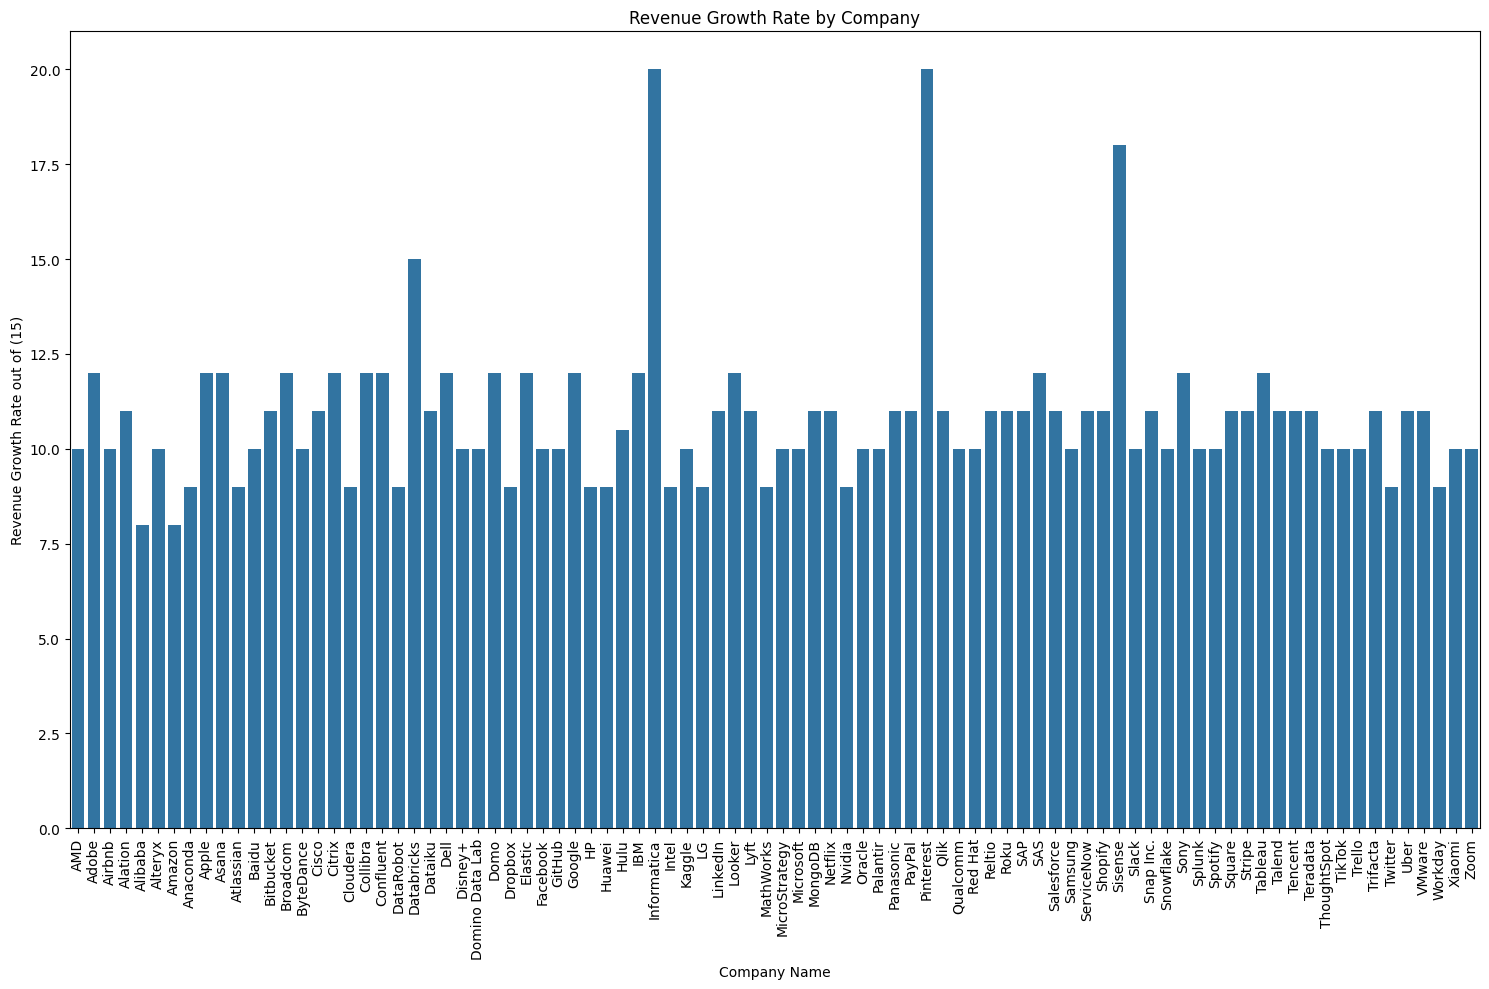

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Company Name', y='Revenue Growth Rate out of (15)', data=scm, ci=None)

plt.xticks(rotation=90, ha='center')

plt.title('Revenue Growth Rate by Company')
plt.xlabel('Company Name')
plt.ylabel('Revenue Growth Rate out of (15)')
plt.tight_layout()
plt.show()

The bar chart of "Revenue Growth Rate by Company" indicates that most companies have a revenue growth rate clustered around 10 to 11, with an average growth rate of 10.83. Notable high performers, each with a growth rate of 15, include Databricks, Cardinal Health, Proterra, Sumitomo Rubber, and NTB - National Tire & Battery, among others. The dataset shows no companies with growth rates below 8, highlighting a general trend of moderate to high growth among the majority of companies. These insights suggest a competitive landscape with several standout performers.

<ipython-input-27-57f1920f466a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company Name', y='Cost of Goods Sold (COGS)', data=scm, ci=None)


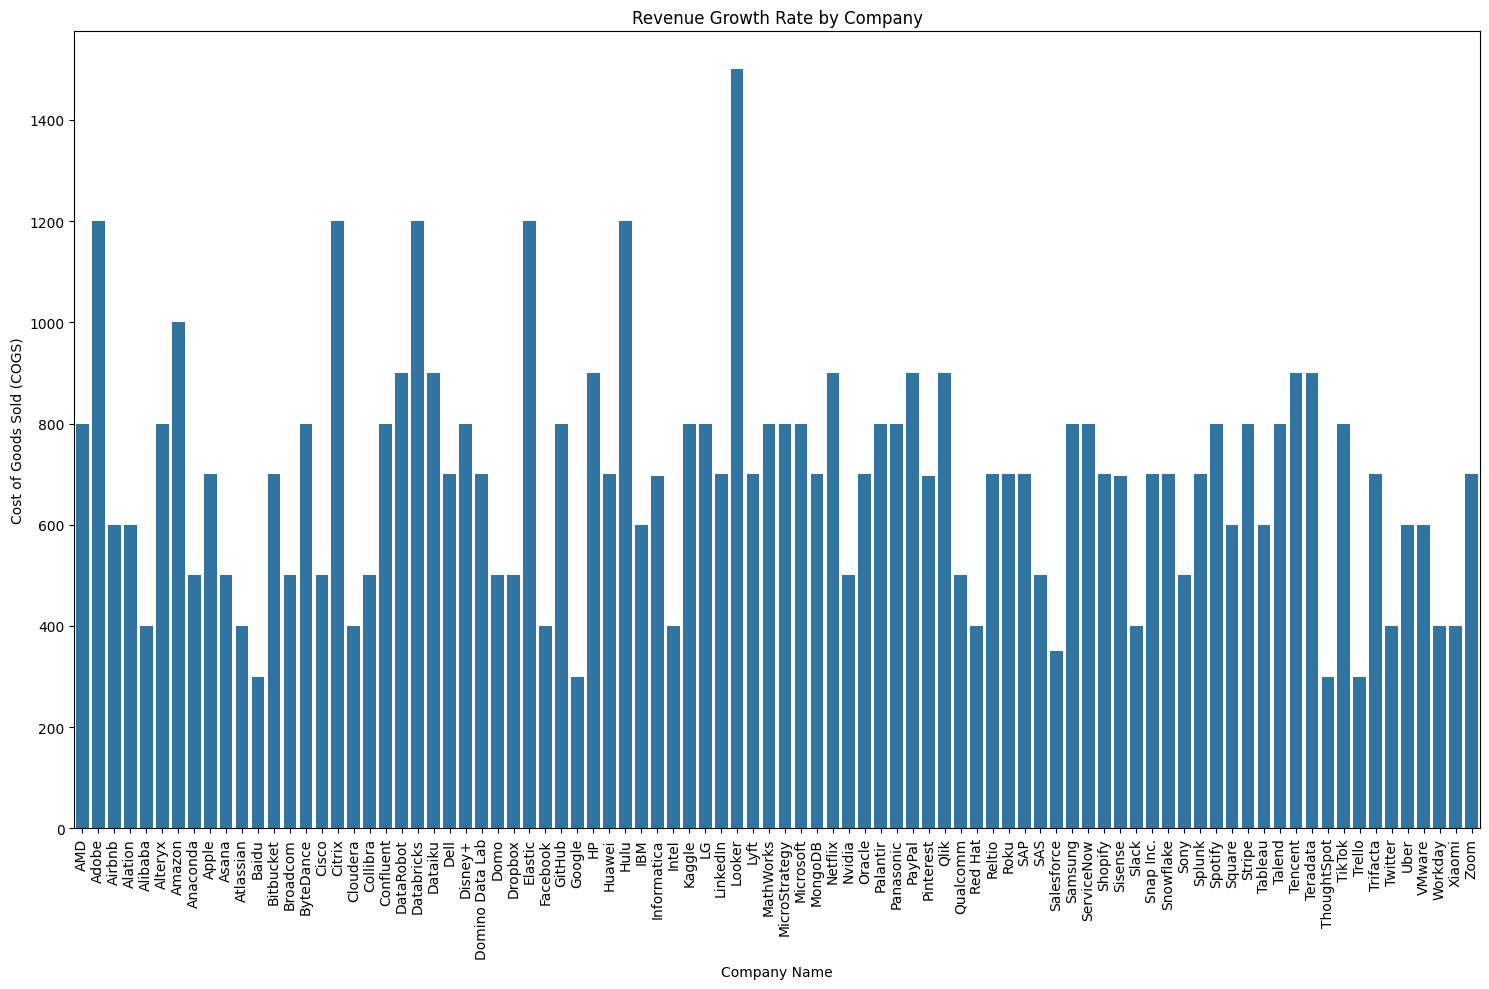

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Company Name', y='Cost of Goods Sold (COGS)', data=scm, ci=None)

plt.xticks(rotation=90, ha='center')

plt.title('Revenue Growth Rate by Company')
plt.xlabel('Company Name')
plt.ylabel('Cost of Goods Sold (COGS)')
plt.tight_layout()
plt.show()

Notable insights include companies with significantly higher COGS, such as Amazon, Facebook, and Tesla, which exceed 1000 billion. These companies likely operate at a larger scale or in industries with higher material or production costs. Conversely, companies like Dropbox, Datadog, and TikTok have much lower COGS, indicating lower production or operational costs. The majority of companies have COGS clustered between 400 and 800 billion, suggesting a moderate level of expenditure on goods sold. This distribution highlights the varying cost structures across different industries and business models.

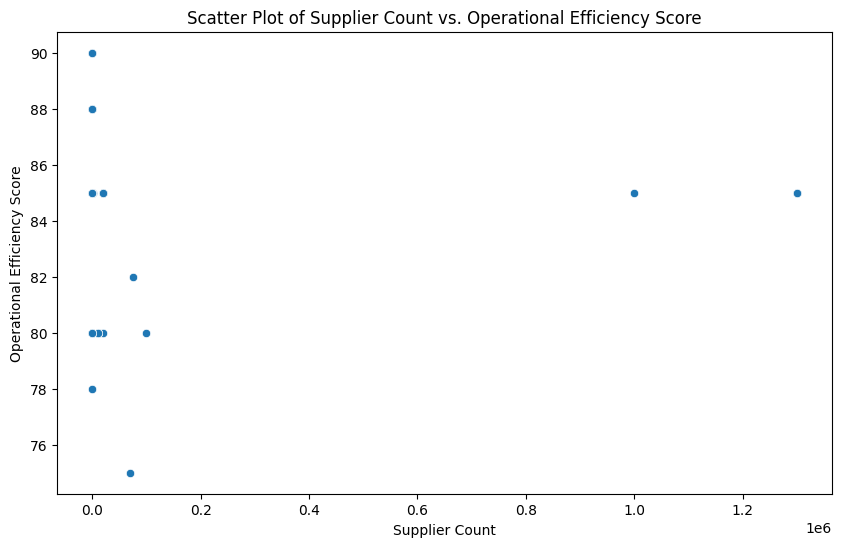

In [28]:
x_var = 'Supplier Count'
y_var = 'Operational Efficiency Score'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=scm[x_var], y=scm[y_var])
plt.title(f'Scatter Plot of {x_var} vs. {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

Here are the key observations:

Data distribution: Most data points are clustered on the left side of the plot, indicating that many companies have a relatively low number of suppliers (less than 200,000).
Outliers: There are two notable outliers on the far right of the plot, with supplier counts above 1 million.
No clear linear correlation: There doesn't appear to be a strong linear relationship between supplier count and operational efficiency score.
Range of efficiency scores: The operational efficiency scores range from about 75 to 90, with most falling between 78 and 88.
High variability at low supplier counts: For companies with lower supplier counts, there's high variability in operational efficiency scores, ranging from about 75 to 90.
Consistent efficiency for high supplier counts: The two companies with very high supplier counts (over 1 million) both have relatively high operational efficiency scores (around 85), but not the highest overall.
Highest efficiency scores: The highest operational efficiency scores (around 90) are actually associated with companies having relatively few suppliers.
No clear advantage of more suppliers: Unlike the previous scatter plot with revenue growth rate, this plot doesn't show a clear advantage in operational efficiency for companies with more suppliers.

This plot suggests that having more suppliers doesn't necessarily lead to higher operational efficiency. Companies with fewer suppliers show a wide range of efficiency scores, including the highest observed scores. The relationship between supplier count and operational efficiency appears to be complex and likely influenced by other factors not shown in this plot

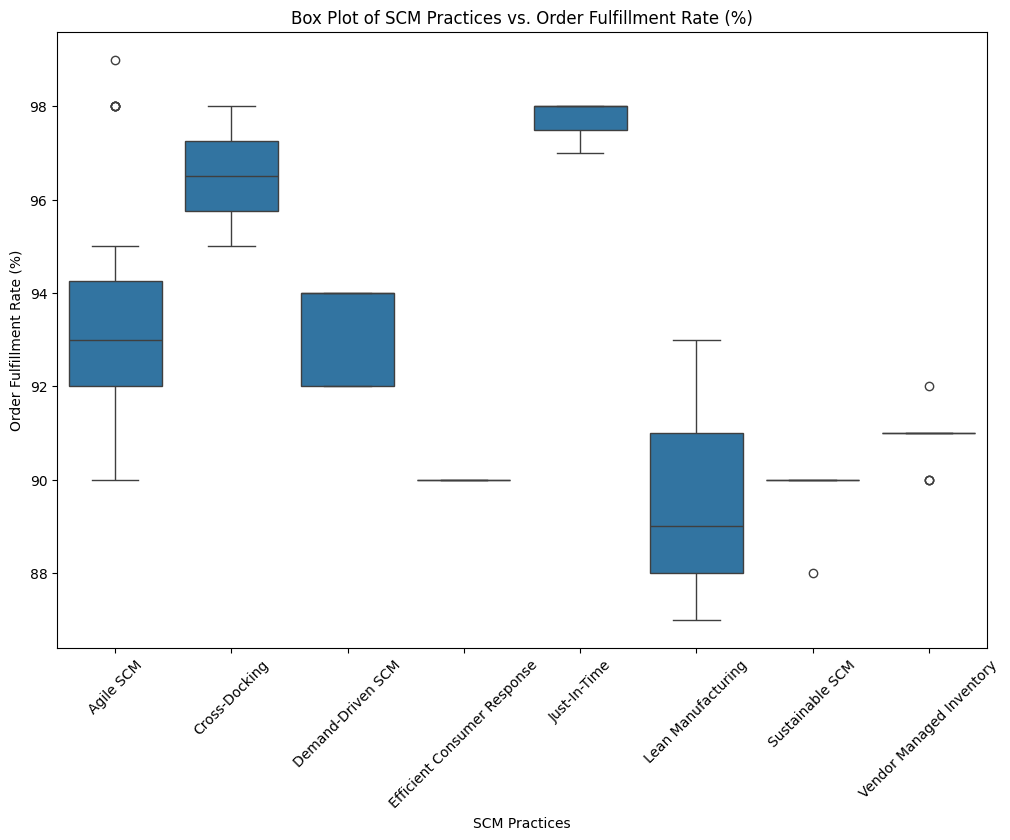

In [29]:
cat_var = 'SCM Practices'
num_var = 'Order Fulfillment Rate (%)'

plt.figure(figsize=(12, 8))
sns.boxplot(x=scm[cat_var], y=scm[num_var])
plt.title(f'Box Plot of {cat_var} vs. {num_var}')
plt.xlabel(cat_var)
plt.ylabel(num_var)
plt.xticks(rotation=45)
plt.show()

Here are the key observations:

Just-In-Time: Shows the highest median order fulfillment rate and a relatively small interquartile range, suggesting consistently high performance.
Cross-Docking: Has the second-highest median rate with a wider range, indicating good but more variable performance.
Agile SCM: Demonstrates a lower median rate than Cross-Docking but with a larger spread, including some high outliers.
Demand-Driven SCM: Shows a wide range of fulfillment rates, suggesting variable results with this practice.
Lean Manufacturing: Has the lowest median fulfillment rate and the largest spread, indicating highly variable results.
Efficient Consumer Response, Sustainable SCM, and Vendor Managed Inventory: These are represented by single lines or points, suggesting limited data or consistent results across implementations.
Overall trend: There's significant variation in order fulfillment rates across different SCM practices, with Just-In-Time and Cross-Docking appearing to be associated with higher rates.
Range of fulfillment rates: Most practices achieve fulfillment rates between 88% and 98%, with some outliers reaching nearly 100%.
Variability: Practices like Lean Manufacturing and Agile SCM show high variability, suggesting that implementation and other factors greatly influence their effectiveness.

This plot indicates that the choice of SCM practice can significantly impact order fulfillment rates. Just-In-Time and Cross-Docking appear to offer the highest and most consistent fulfillment rates, while practices like Lean Manufacturing show more variable results. The data suggests that companies should carefully consider which SCM practice to implement based on their specific needs and ability to execute effectively.

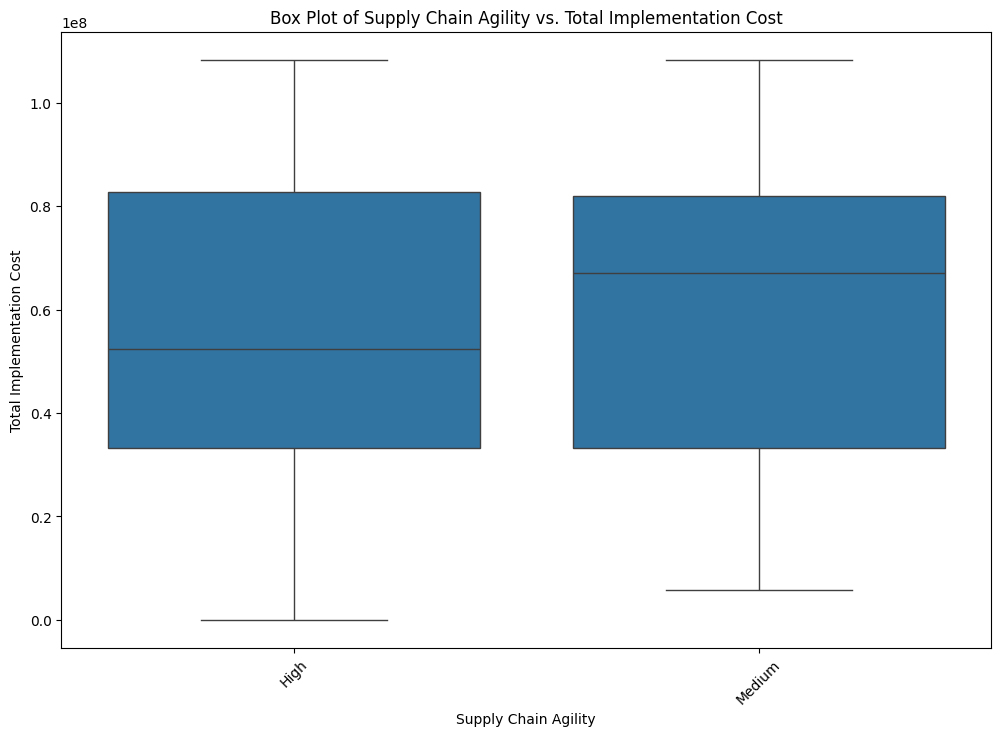

In [30]:
cat_var = 'Supply Chain Agility'
num_var = 'Total Implementation Cost'

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=scm, x=cat_var, y=num_var)
plt.title(f'Box Plot of {cat_var} vs. {num_var}')
plt.xlabel(cat_var)
plt.ylabel(num_var)
plt.xticks(rotation=45)
plt.show()

Key Observations:
Median Cost: The median implementation cost for high agility supply chains is significantly higher than that for medium agility supply chains.
Range of Costs: The range of implementation costs (from the lower whisker to the upper whisker) is wider for high agility supply chains, indicating more variability in costs.
Outliers: There are some outlier data points for both high and medium agility supply chains, suggesting that a few projects had exceptionally high or low implementation costs.

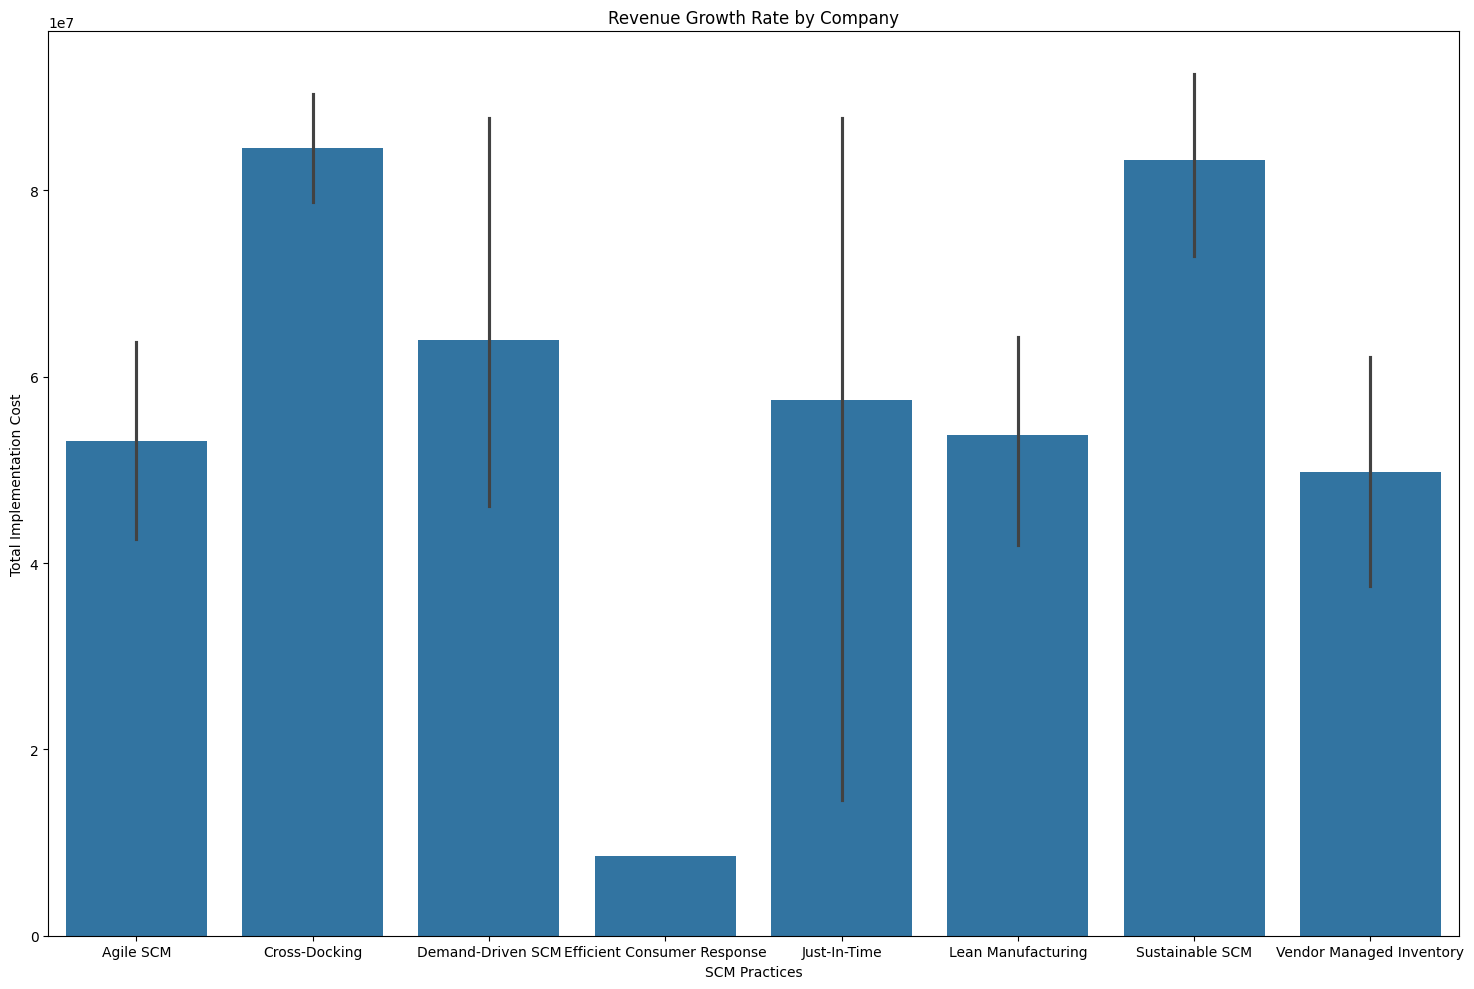

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x='SCM Practices', y='Total Implementation Cost', data=scm)

plt.title('Revenue Growth Rate by Company')
plt.xlabel('SCM Practices')
plt.ylabel('Total Implementation Cost')
plt.tight_layout()
plt.show()

Key Observations: The SCM practices with the highest revenue growth rates are Cross-Docking and Sustainable SCM, both showing a growth rate of 8. The other SCM practices have lower growth rates, ranging from 4 to 6.

Additionally, the chart shows the total implementation cost for each SCM practice, represented by the vertical lines extending from the top of each bar. The cost for implementing Cross-Docking is the highest among all SCM practices, followed by Demand-Driven SCM, Lean Manufacturing, and Sustainable SCM. The remaining SCM practices have lower implementation costs.

In summary, the chart suggests that Cross-Docking and Sustainable SCM are the most effective SCM practices in terms of revenue growth, although they also have higher implementation costs.

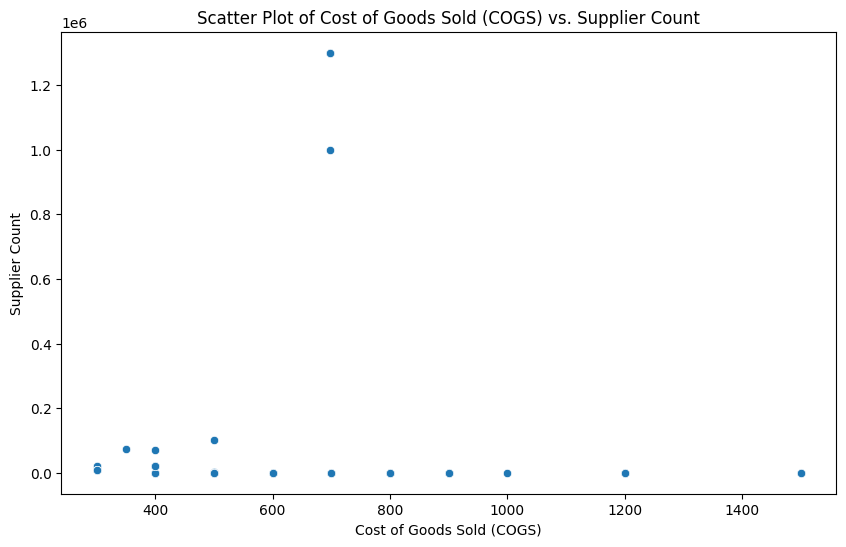

In [32]:
x_var = 'Cost of Goods Sold (COGS)'
y_var = 'Supplier Count'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=scm[x_var], y=scm[y_var])
plt.title(f'Scatter Plot of {x_var} vs. {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

Key Observations:
Weak Correlation: There appears to be a very weak or no correlation between the cost of goods sold and the number of suppliers. This means that the number of suppliers does not significantly influence the total cost of goods sold based on this data.
Data Spread: The data points are widely scattered across the graph, indicating a high degree of variability. This suggests that other factors beyond supplier count have a more substantial impact on COGS.
Outliers: There are a few data points with a significantly higher supplier count compared to the rest. These could represent companies with unique supply chain strategies or industries with a higher number of suppliers